<a href="https://colab.research.google.com/github/Wyrmwind/AI-Final-Project/blob/main/AI_FInal_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load data
df = pd.read_csv("movies_dataset.csv")

# Clean column names
df.columns = df.columns.str.lower().str.replace(" ", "_")

# Rename columns
df = df.rename(columns={
    'releaseyear': 'release_year',
    'budgetusd': 'budget',
    'global_boxofficeusd': 'revenue',
    'imdbrating': 'imdb_rating'
})

# Convert to numeric
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
df['imdb_rating'] = pd.to_numeric(df['imdb_rating'], errors='coerce')

In [ ]:
# Remove invalid rows
df = df.dropna(subset=['release_year', 'budget', 'revenue', 'imdb_rating'])
df = df[df['budget'] > 0]

# Create profit and ROI
df['profit'] = df['revenue'] - df['budget']
df['roi'] = (df['profit'] / df['budget']) * 100

print("=" * 80)
print("MOVIE DATASET ANALYSIS - VISUALIZATIONS")
print("=" * 80)

MOVIE DATASET ANALYSIS - VISUALIZATIONS


In [ ]:
# ============================================================================
# QUESTION 1: TRENDS OVER TIME
# ============================================================================
print("\n📊 QUESTION 1: Exploring Trends Over Time")
print("-" * 80)

# Movies per year
movies_per_year = df.groupby('release_year').size()
print(f"✓ Calculated movies per year: {len(movies_per_year)} years analyzed")


📊 QUESTION 1: Exploring Trends Over Time
--------------------------------------------------------------------------------
✓ Calculated movies per year: 76 years analyzed


In [ ]:
# Box office trend
box_office_trend = df.groupby('release_year')['revenue'].mean()
print(f"✓ Calculated average box office by year")

✓ Calculated average box office by year


In [ ]:
# Ratings trend
rating_trend = df.groupby('release_year')['imdb_rating'].mean()
print(f"✓ Calculated average rating by year")
print(f"  → Overall average rating: {rating_trend.mean():.2f}")
print(f"  → Rating range: {rating_trend.min():.2f} to {rating_trend.max():.2f}")

✓ Calculated average rating by year
  → Overall average rating: 6.49
  → Rating range: 6.44 to 6.55



✅ Saved: question1_trends.png


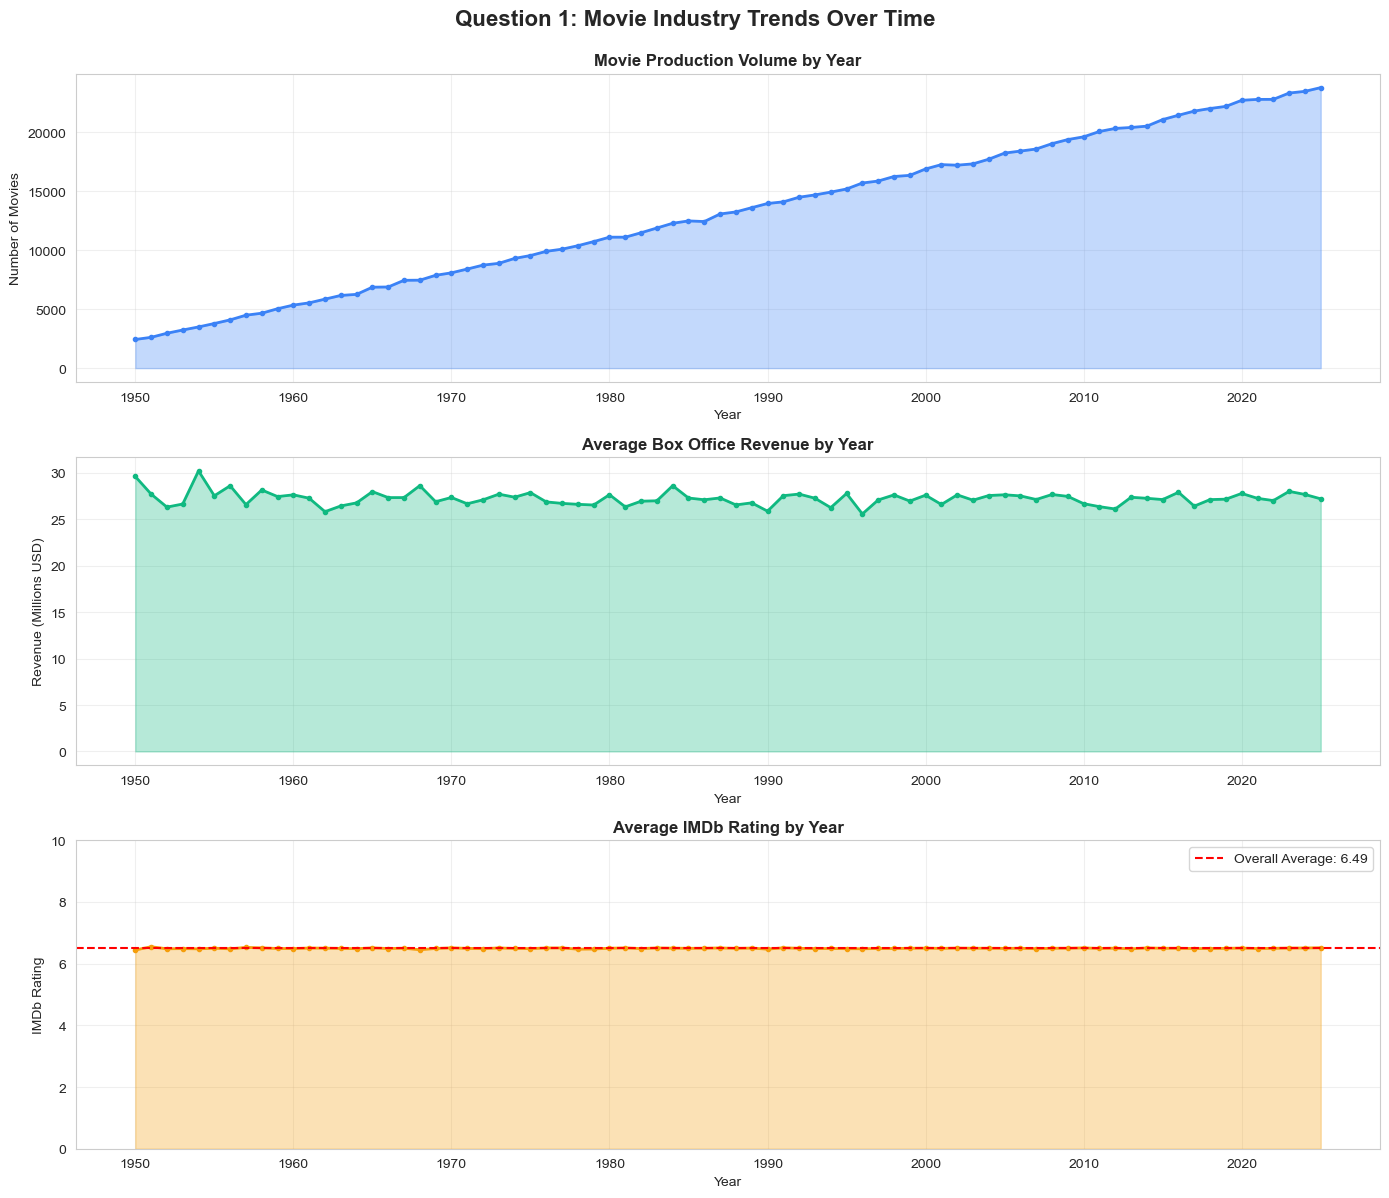

In [ ]:
# Create subplots for Question 1
fig, axes = plt.subplots(3, 1, figsize=(14, 12))
fig.suptitle('Question 1: Movie Industry Trends Over Time', fontsize=16, fontweight='bold', y=0.995)
# Plot 1: Number of movies
axes[0].plot(movies_per_year.index, movies_per_year.values, color='#3b82f6', linewidth=2, marker='o', markersize=3)
axes[0].set_title('Movie Production Volume by Year', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Movies')
axes[0].grid(True, alpha=0.3)
axes[0].fill_between(movies_per_year.index, movies_per_year.values, alpha=0.3, color='#3b82f6')

# Plot 2: Average box office
axes[1].plot(box_office_trend.index, box_office_trend.values/1e6, color='#10b981', linewidth=2, marker='o', markersize=3)
axes[1].set_title('Average Box Office Revenue by Year', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Revenue (Millions USD)')
axes[1].grid(True, alpha=0.3)
axes[1].fill_between(box_office_trend.index, box_office_trend.values/1e6, alpha=0.3, color='#10b981')

# Plot 3: Average ratings (YOUR RATING TREND!)
axes[2].plot(rating_trend.index, rating_trend.values, color='#f59e0b', linewidth=2, marker='o', markersize=3)
axes[2].set_title('Average IMDb Rating by Year', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('IMDb Rating')
axes[2].set_ylim(0, 10)
axes[2].grid(True, alpha=0.3)
axes[2].axhline(y=rating_trend.mean(), color='red', linestyle='--', label=f'Overall Average: {rating_trend.mean():.2f}')
axes[2].fill_between(rating_trend.index, rating_trend.values, alpha=0.3, color='#f59e0b')
axes[2].legend()

plt.tight_layout()
plt.savefig('question1_trends.png', dpi=300, bbox_inches='tight')
print("\n✅ Saved: question1_trends.png")
plt.show()


💰 QUESTION 2: Budget vs Revenue Relationship
--------------------------------------------------------------------------------
✓ Budget-Revenue Correlation: 0.8955
✓ Budget-ROI Correlation: -0.0011
  → Average Profit: $17.40M
  → Average ROI: 177.8%

✅ Saved: question2_budget_revenue.png


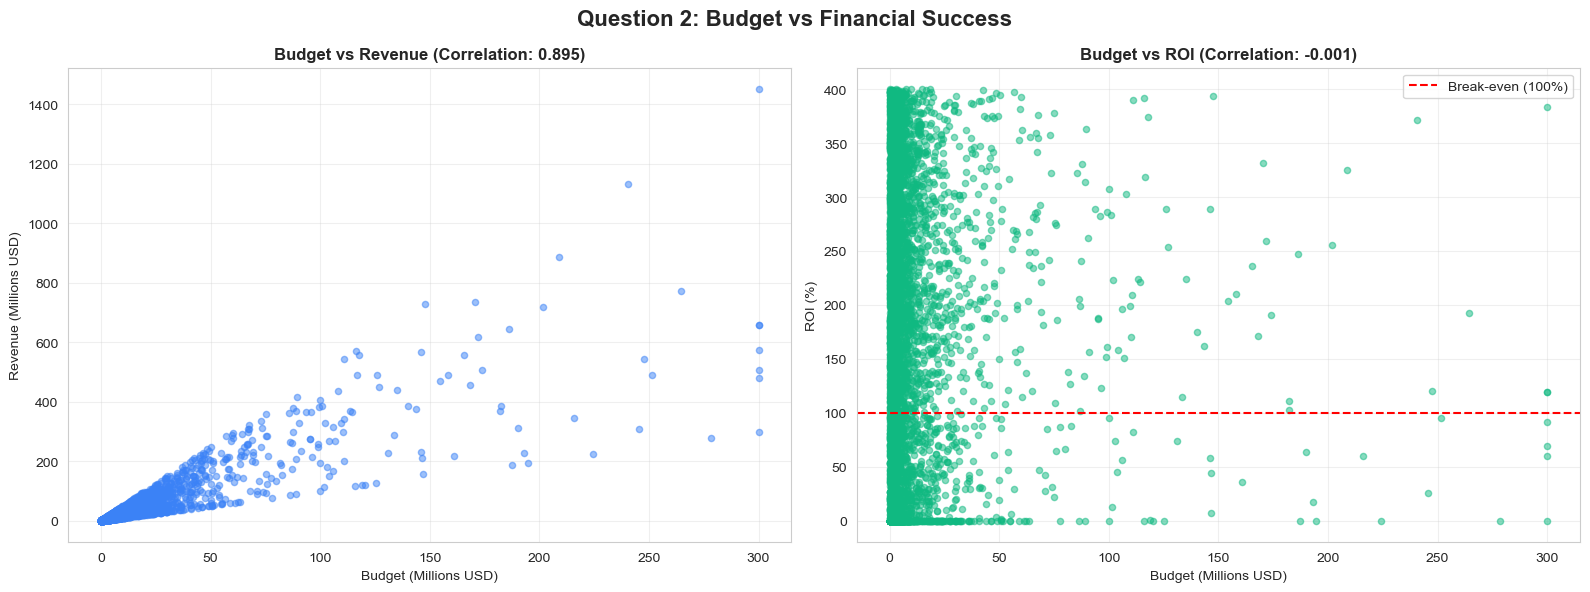

In [ ]:
# QUESTION 2: BUDGET VS REVENUE
# ============================================================================
print("\n💰 QUESTION 2: Budget vs Revenue Relationship")
print("-" * 80)

# Calculate correlation
budget_revenue_corr = df['budget'].corr(df['revenue'])
budget_roi_corr = df['budget'].corr(df['roi'])
print(f"✓ Budget-Revenue Correlation: {budget_revenue_corr:.4f}")
print(f"✓ Budget-ROI Correlation: {budget_roi_corr:.4f}")
print(f"  → Average Profit: ${df['profit'].mean()/1e6:.2f}M")
print(f"  → Average ROI: {df['roi'].mean():.1f}%")

# Create figure for Question 2
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Question 2: Budget vs Financial Success', fontsize=16, fontweight='bold')

# Scatter: Budget vs Revenue
sample_df = df.sample(n=min(5000, len(df)), random_state=42)
axes[0].scatter(sample_df['budget']/1e6, sample_df['revenue']/1e6, alpha=0.5, s=20, color='#3b82f6')
axes[0].set_title(f'Budget vs Revenue (Correlation: {budget_revenue_corr:.3f})', fontweight='bold')
axes[0].set_xlabel('Budget (Millions USD)')
axes[0].set_ylabel('Revenue (Millions USD)')
axes[0].grid(True, alpha=0.3)

# Scatter: Budget vs ROI
axes[1].scatter(sample_df['budget']/1e6, sample_df['roi'], alpha=0.5, s=20, color='#10b981')
axes[1].set_title(f'Budget vs ROI (Correlation: {budget_roi_corr:.3f})', fontweight='bold')
axes[1].set_xlabel('Budget (Millions USD)')
axes[1].set_ylabel('ROI (%)')
axes[1].axhline(y=100, color='red', linestyle='--', label='Break-even (100%)')
axes[1].grid(True, alpha=0.3)
axes[1].legend()

plt.tight_layout()
plt.savefig('question2_budget_revenue.png', dpi=300, bbox_inches='tight')
print("\n✅ Saved: question2_budget_revenue.png")
plt.show()


🎬 QUESTION 3: Genre Popularity and Profitability
--------------------------------------------------------------------------------
✓ Analyzed 8 unique genres
  → Most popular: ['Drama'] (250018 movies)
  → Most profitable: Documentary

✅ Saved: question3_genres.png


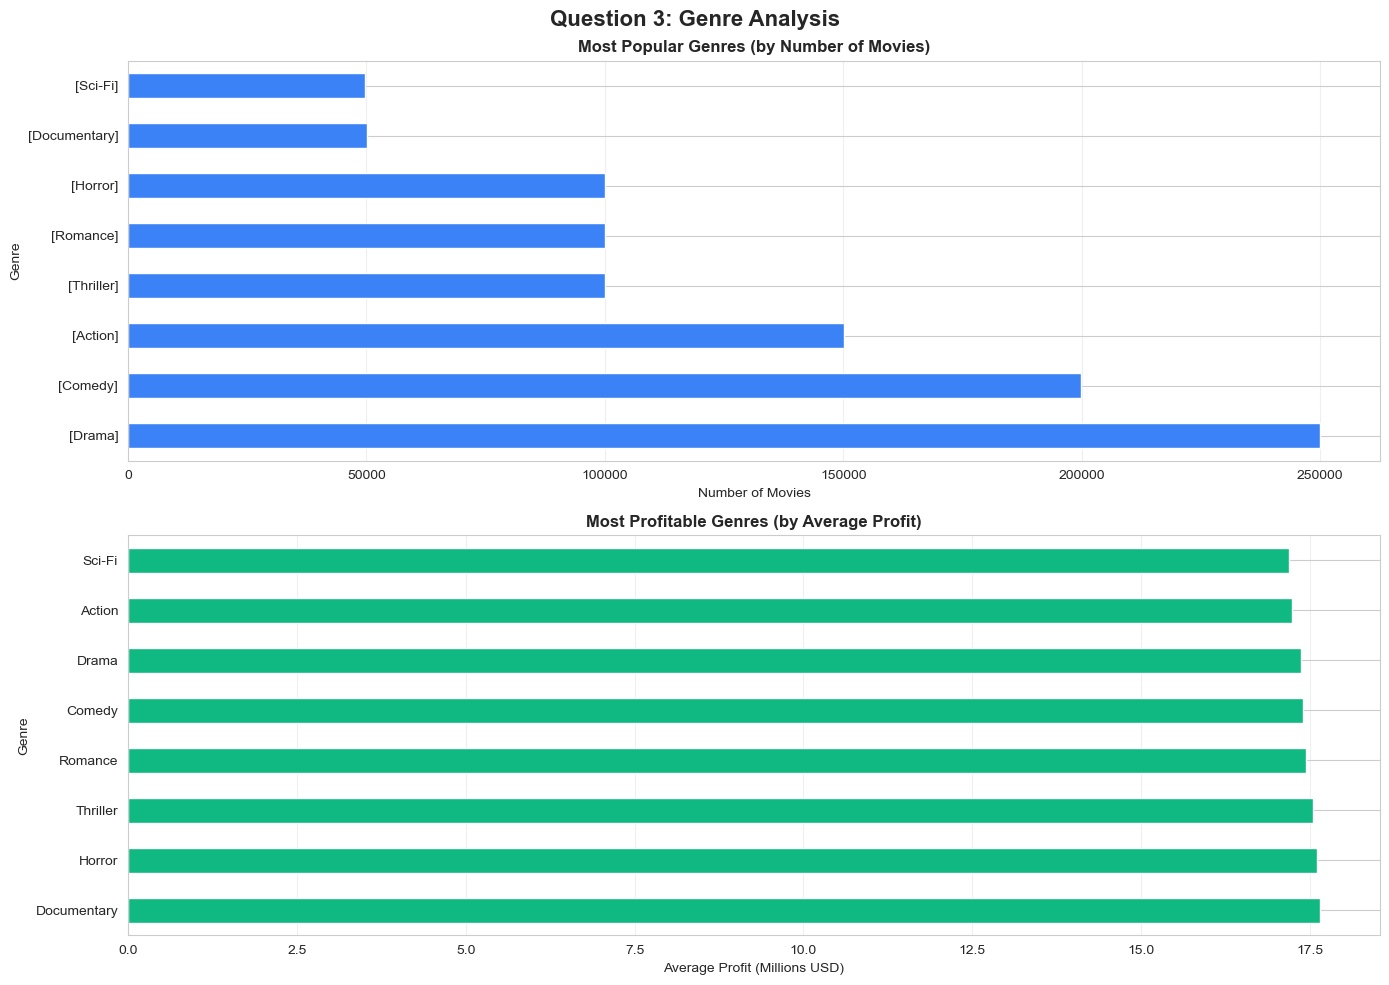

In [ ]:
# ============================================================================
# QUESTION 3: GENRE ANALYSIS
# ============================================================================
print("\n🎬 QUESTION 3: Genre Popularity and Profitability")
print("-" * 80)

# Explode genres
df['genre'] = df['genre'].str.split('|')
df_exploded = df.explode('genre')

# Genre popularity
genre_counts = df['genre'].value_counts().head(8)
print(f"✓ Analyzed {len(df['genre'].value_counts())} unique genres")
print(f"  → Most popular: {genre_counts.index[0]} ({genre_counts.values[0]} movies)")

# Genre profitability
genre_profitability = (
    df_exploded.groupby('genre')[['revenue', 'profit', 'roi']]
    .mean()
    .sort_values('profit', ascending=False)
    .head(8)
)
print(f"  → Most profitable: {genre_profitability.index[0]}")

# Create figure for Question 3
fig, axes = plt.subplots(2, 1, figsize=(14, 10))
fig.suptitle('Question 3: Genre Analysis', fontsize=16, fontweight='bold')

# Bar chart: Popularity
genre_counts.plot(kind='barh', ax=axes[0], color='#3b82f6')
axes[0].set_title('Most Popular Genres (by Number of Movies)', fontweight='bold')
axes[0].set_xlabel('Number of Movies')
axes[0].set_ylabel('Genre')
axes[0].grid(True, alpha=0.3, axis='x')

# Bar chart: Profitability
genre_profitability['profit'].div(1e6).plot(kind='barh', ax=axes[1], color='#10b981')
axes[1].set_title('Most Profitable Genres (by Average Profit)', fontweight='bold')
axes[1].set_xlabel('Average Profit (Millions USD)')
axes[1].set_ylabel('Genre')
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('question3_genres.png', dpi=300, bbox_inches='tight')
print("\n✅ Saved: question3_genres.png")
plt.show()


🎥 QUESTION 4: Best Directors Analysis
--------------------------------------------------------------------------------
✓ Analyzed 150 directors (with 5+ movies)
  → Highest rated director: Carolyn Schwartz (Avg: 6.54)
  → Highest revenue director: Albert Phillips (Avg: $29.32M)

✅ Saved: question4_directors.png


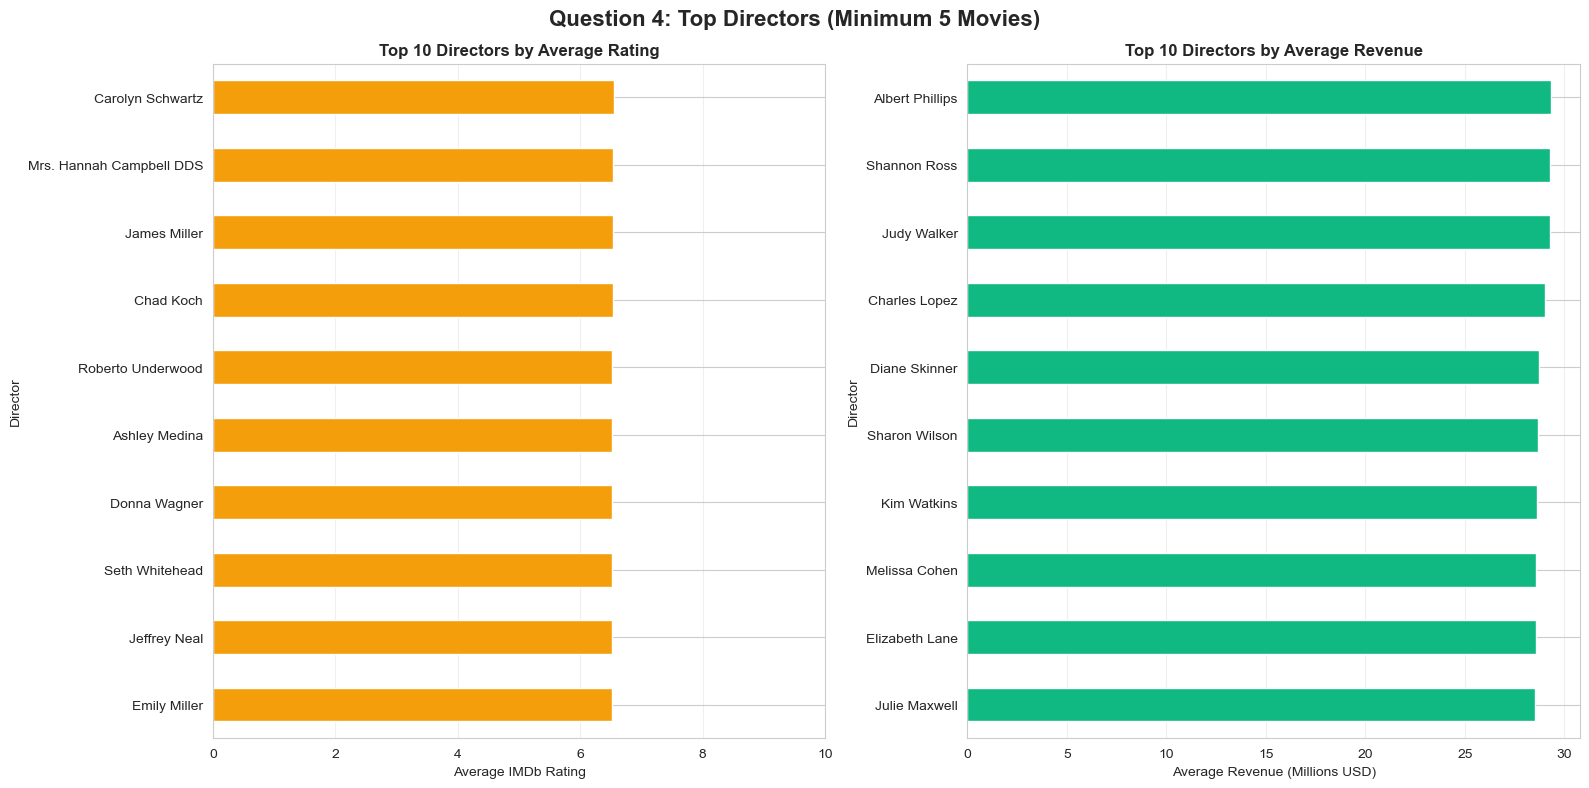

In [ ]:
# QUESTION 4: TOP DIRECTORS
# ============================================================================
print("\n🎥 QUESTION 4: Best Directors Analysis")
print("-" * 80)

# Director stats
director_stats = (
    df.groupby('director')
    .agg(
        num_movies=('title', 'count'),
        avg_rating=('imdb_rating', 'mean'),
        avg_revenue=('revenue', 'mean'),
        avg_profit=('profit', 'mean'),
        avg_roi=('roi', 'mean')
    )
)

# Filter directors with at least 5 movies
director_stats = director_stats[director_stats['num_movies'] >= 5]
print(f"✓ Analyzed {len(director_stats)} directors (with 5+ movies)")

# Top by rating
top_by_rating = director_stats.nlargest(10, 'avg_rating')
print(f"  → Highest rated director: {top_by_rating.index[0]} (Avg: {top_by_rating.iloc[0]['avg_rating']:.2f})")

# Top by revenue
top_by_revenue = director_stats.nlargest(10, 'avg_revenue')
print(f"  → Highest revenue director: {top_by_revenue.index[0]} (Avg: ${top_by_revenue.iloc[0]['avg_revenue']/1e6:.2f}M)")

# Create figure for Question 4
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle('Question 4: Top Directors (Minimum 5 Movies)', fontsize=16, fontweight='bold')

# Top directors by rating
top_by_rating.head(10)['avg_rating'].sort_values().plot(kind='barh', ax=axes[0], color='#f59e0b')
axes[0].set_title('Top 10 Directors by Average Rating', fontweight='bold')
axes[0].set_xlabel('Average IMDb Rating')
axes[0].set_ylabel('Director')
axes[0].set_xlim(0, 10)
axes[0].grid(True, alpha=0.3, axis='x')

# Top directors by revenue
top_by_revenue.head(10)['avg_revenue'].div(1e6).sort_values().plot(kind='barh', ax=axes[1], color='#10b981')
axes[1].set_title('Top 10 Directors by Average Revenue', fontweight='bold')
axes[1].set_xlabel('Average Revenue (Millions USD)')
axes[1].set_ylabel('Director')
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('question4_directors.png', dpi=300, bbox_inches='tight')
print("\n✅ Saved: question4_directors.png")
plt.show()

In [ ]:
#Questions 2: What is the relationship between a movie's production budget and its financial success? Investigate both total revenue and profitability. Is a higher budget a guarantee of a higher return on investment?
Budget vs. Revenue: What is the relationship between a movie's budget and its worldwide revenue? Are higher-budget films guaranteed to be more profitable?

In [ ]:
#4Question:  The "Best" Directors: Which directors consistently deliver high-rated and commercially successful films?

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("movies_dataset.csv")

In [ ]:
# Clean column names
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [ ]:
# Rename important columns
df = df.rename(columns={
    'releaseyear': 'release_year',
    'budgetusd': 'budget',
    'global_boxofficeusd': 'revenue',
    'imdbrating': 'imdb_rating'
})

In [ ]:
# Convert numeric columns
for col in ['budget', 'revenue', 'imdb_rating']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df[col]

0         6.2
1         5.2
2         5.5
3         7.3
4         6.1
         ... 
999994    4.8
999995    7.3
999996    4.1
999997    4.3
999998    6.6
Name: imdb_rating, Length: 999999, dtype: float64

In [ ]:
# Remove invalid rows
df = df.dropna(subset=['director', 'budget', 'revenue', 'imdb_rating'])
df = df[df['budget'] > 0]

In [ ]:
# Create Profit and ROI
df['profit'] = df['revenue'] - df['budget']
df['roi'] = (df['profit'] / df['budget']) * 100

In [ ]:
director_stats = (
    df.groupby('director')
      .agg(
          num_movies=('title', 'count'),
          avg_rating=('imdb_rating', 'mean'),
          avg_revenue=('revenue', 'mean'),
          avg_profit=('profit', 'mean'),
          avg_roi=('roi', 'mean')
      )
)
director_stats

,num_movies,avg_rating,avg_revenue,avg_profit,avg_roi
director,,,,,
Abigail Robles,6701,6.488375,2.649502e+07,1.693954e+07,178.697251
Adam Brown,6741,6.504376,2.831351e+07,1.822524e+07,175.510502
Adriana Campbell,6748,6.483239,2.592202e+07,1.653771e+07,179.263592
Albert Phillips,6634,6.481926,2.931506e+07,1.886497e+07,179.793101
Alyssa Adams,6771,6.498198,2.793162e+07,1.779249e+07,178.717646
...,...,...,...,...,...
Tyler Sanchez,6508,6.474462,2.682835e+07,1.708764e+07,176.273239
Vanessa Fox,6647,6.511810,2.616963e+07,1.670259e+07,176.383380
William Banks,6667,6.489516,2.630660e+07,1.679249e+07,175.038902


In [ ]:
director_stats = director_stats[director_stats['num_movies'] > 3]
director_stats

,num_movies,avg_rating,avg_revenue,avg_profit,avg_roi
director,,,,,
Abigail Robles,6701,6.488375,2.649502e+07,1.693954e+07,178.697251
Adam Brown,6741,6.504376,2.831351e+07,1.822524e+07,175.510502
Adriana Campbell,6748,6.483239,2.592202e+07,1.653771e+07,179.263592
Albert Phillips,6634,6.481926,2.931506e+07,1.886497e+07,179.793101
Alyssa Adams,6771,6.498198,2.793162e+07,1.779249e+07,178.717646
...,...,...,...,...,...
Tyler Sanchez,6508,6.474462,2.682835e+07,1.708764e+07,176.273239
Vanessa Fox,6647,6.511810,2.616963e+07,1.670259e+07,176.383380
William Banks,6667,6.489516,2.630660e+07,1.679249e+07,175.038902
